Mounted at /content/drive
Logistic Regression using TF-IDF
Accuracy: 0.6538461538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75        36
           1       0.62      0.29      0.39        28
           2       0.62      0.78      0.69        40

    accuracy                           0.65       104
   macro avg       0.65      0.62      0.61       104
weighted avg       0.65      0.65      0.63       104



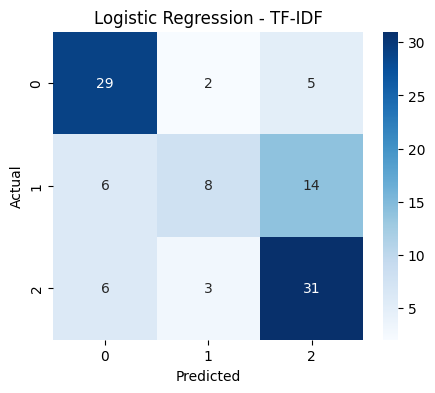

Saved: /content/drive/MyDrive/PRML_Project/Logistic_Regression/models/logistic_regression_tf-idf.pkl

Logistic Regression using BoW
Accuracy: 0.7019230769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69        36
           1       0.66      0.68      0.67        28
           2       0.70      0.78      0.74        40

    accuracy                           0.70       104
   macro avg       0.70      0.70      0.70       104
weighted avg       0.70      0.70      0.70       104



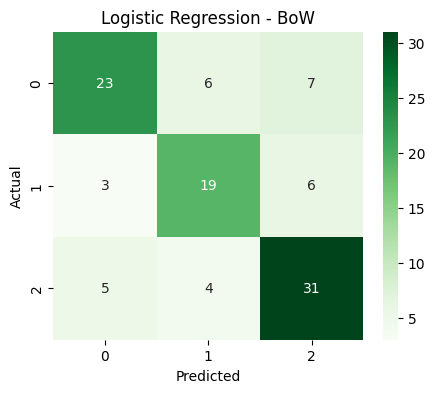

Saved: /content/drive/MyDrive/PRML_Project/Logistic_Regression/models/logistic_regression_bow.pkl



In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
pca_dir = '/content/drive/MyDrive/PRML_Project/Logistic_Regression/pca_data'
label_dir = '/content/drive/MyDrive/PRML_Project/Logistic_Regression/split_data'
model_dir = '/content/drive/MyDrive/PRML_Project/Logistic_Regression/models'
os.makedirs(model_dir, exist_ok=True)

# Load reduced TF-IDF and BoW features
X_tfidf_train = np.load(f"{pca_dir}/X_tfidf_train_reduced.npy")
X_tfidf_test = np.load(f"{pca_dir}/X_tfidf_test_reduced.npy")
X_bow_train = np.load(f"{pca_dir}/X_bow_train_reduced.npy")
X_bow_test = np.load(f"{pca_dir}/X_bow_test_reduced.npy")

# Load labels
y_tfidf_train = np.load(f"{label_dir}/y_tfidf_train.npy")
y_tfidf_test = np.load(f"{label_dir}/y_tfidf_test.npy")
y_bow_train = np.load(f"{label_dir}/y_bow_train.npy")
y_bow_test = np.load(f"{label_dir}/y_bow_test.npy")

# Define helper for training & evaluating
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, feature_type, color='Blues'):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} using {feature_type}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=color)
    plt.title(f"{model_name} - {feature_type}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Save model
    filename = f"{model_dir}/{model_name.lower().replace(' ', '_')}_{feature_type.lower()}.pkl"
    joblib.dump(model, filename)
    print(f"Saved: {filename}\n")

# Logistic Regression model with default parameters
model = LogisticRegression(max_iter=1000, random_state=42)
train_evaluate_model(model, X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test, "Logistic Regression", "TF-IDF", color='Blues')
train_evaluate_model(model, X_bow_train, X_bow_test, y_bow_train, y_bow_test, "Logistic Regression", "BoW", color='Greens')